In [770]:
### Importing the libraries ###
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0 , 9.0)

In [771]:
### Importing The Dataset ### 
dataset = pd.read_csv('home.txt' , names=['Size' , 'Bedrooms' , 'Price'])
dataset.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [772]:
dataset.shape

(47, 3)

In [773]:
##Creating matrix of feature 
x = dataset.iloc[: , :2].values
##Creating Dependent variable vector
y = dataset.iloc[: , -1].values

In [774]:
x

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3],
       [1940,    4],
       [2000,    3],
       [1890,    3],
       [4478,    5],
       [1268,    3],
       [2300,    4],
       [1320,    2],
       [1236,    3],
       [2609,    4],
       [3031,    4],
       [1767,    3],
       [1888,    2],
       [1604,    3],
       [1962,    4],
       [3890,    3],
       [1100,    3],
       [1458,    3],
       [2526,    3],
       [2200,    3],
       [2637,    3],
       [1839,    2],
       [1000,    1],
       [2040,    4],
       [3137,    3],
       [1811,    4],
       [1437,    3],
       [1239,    3],
       [2132,    4],
       [4215,    4],
       [2162,    4],
       [1664,    2],
       [2238,    3],
       [2567,    4],
       [1200,    3],
       [ 852,    2],
       [1852,    4],
       [1203,    3]], dtype=int64)

In [775]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [776]:
### Spliting the dataset into the Training Set and Test Set ###
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 1)

In [777]:
####Feature Scaling ###
from sklearn.preprocessing import StandardScaler
s_sc= StandardScaler()
x_train[ : , 0:] = s_sc.fit_transform(x_train[ : , 0:])
x_test[ : , 0:] = s_sc.fit_transform(x_test[ : , 0:])

In [778]:
### Adding x0 = 1 to features matrix ###
ones = np.ones([x_train.shape[0] , 1] , dtype= 'int64')
x_train = np.concatenate((ones , x_train) , axis = 1)

In [779]:
print(x_train , x_train.shape)

[[ 1  1  1]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  1  0]
 [ 1  0  1]
 [ 1  0  1]
 [ 1  0  0]
 [ 1  0 -1]
 [ 1  3  2]
 [ 1  2  1]
 [ 1  0  0]
 [ 1  0  1]
 [ 1  1  1]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  0  1]
 [ 1  0  0]
 [ 1  0 -1]
 [ 1 -1 -2]
 [ 1  0 -1]
 [ 1  0  0]
 [ 1  0  1]
 [ 1 -1  0]
 [ 1  0  0]
 [ 1  0  0]
 [ 1 -1 -1]
 [ 1  0  0]
 [ 1  0 -1]
 [ 1  0  0]
 [ 1  0  1]
 [ 1  0  1]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  0  1]] (37, 3)


In [780]:
ones = np.ones([x_test.shape[0] , 1] , dtype= 'int64')
x_test = np.concatenate((ones , x_test) , axis = 1)

In [781]:
print(x_test , x_test.shape)

[[ 1  2  0]
 [ 1  0  0]
 [ 1  0  1]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  0 -2]
 [ 1  0  0]
 [ 1  0  1]
 [ 1  0  1]
 [ 1  0  0]] (10, 3)


In [782]:
### Setting parameters ###
theta = np.zeros(x_train.shape[1])
print(theta , theta.shape)

[0. 0. 0.] (3,)


In [783]:
### set hyper parameters ###
alpha = 0.01
epoch = 2000

In [784]:
### Hypothesis ###
def hypo( X , newB):
    h = X.dot(newB)
    return h

In [785]:
### computecost ###
def computeCost(X, Y, B):
    m = len(Y)
    j = np.sum((X.dot(B) - Y) ** 2) / (2*m)
    return j

In [786]:
#### Gradient descent ###
def gradientDescent( X , Y , P , alpha , iterations):
    cost_li = [0] * iterations
    m = len(Y)

    for i in range(iterations):
        #print(i)
        #hypothesis value
        h = X.dot(P)

        # Difference between Hypothesis and Actual Y
        loss = h - Y

        #Gradient Calculation
        gradient = (X.T.dot(loss)) / m
        
        #Changing Values of P using gradient
        P = P - alpha * gradient

        #New cost value
        cost = computeCost(X, Y , P)
        cost_li[i] = cost
        
    
    return P ,cost_li

In [787]:
### Running the gradient descent and cost function ###
parameters , cost_list = gradientDescent(x_train , y_train , theta , alpha , epoch)
print(parameters)

[322118.59 132321.8   14251.47]


In [788]:
print(cost_list)

408936, 3241677987.483726, 3241622093.4551744, 3241566449.1973705, 3241511053.589525, 3241455905.5159516, 3241401003.8660355, 3241346347.534215, 3241291935.4199576, 3241237766.427731, 3241183839.466984, 3241130153.45212, 3241076707.3024764, 3241023499.9422975, 3240970530.3007154, 3240917797.3117266, 3240865299.9141617, 3240813037.051674, 3240761007.6727066, 3240709210.730478, 3240657645.1829515, 3240606309.992819, 3240555204.1274776, 3240504326.559007, 3240453676.264142, 3240403252.224263, 3240353053.425361, 3240303078.858024, 3240253327.517414, 3240203798.4032426, 3240154490.519753, 3240105402.8756967, 3240056534.4843144, 3240007884.3633122, 3239959451.5348425, 3239911235.025485, 3239863233.8662214, 3239815447.092417, 3239767873.7438025, 3239720512.864451, 3239673363.502757, 3239626424.711421, 3239579695.5474224, 3239533175.072004, 3239486862.3506527, 3239440756.453078, 3239394856.45319, 3239349161.4290876, 3239303670.4630294, 3239258382.641421, 3239213297.054793, 3239168412.797785, 3

Text(0.5, 1.0, 'Error vs. Training Epoch')

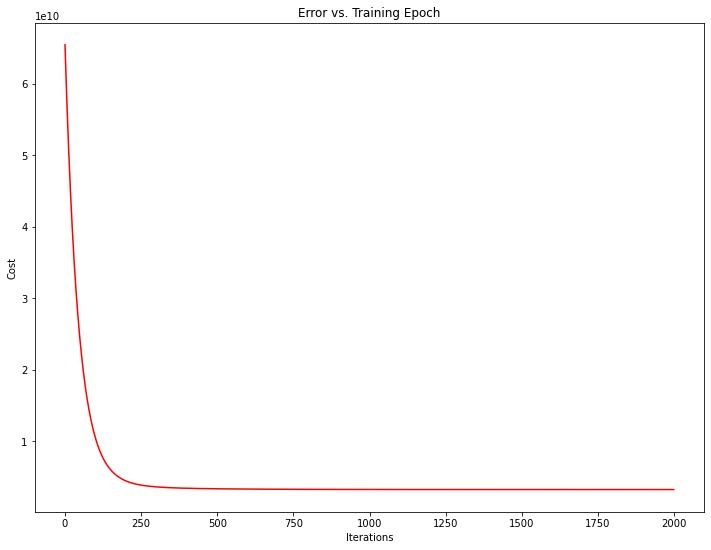

In [789]:
### plot the cost ###
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost_list, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [790]:
### Predicting the ans using x_test ###
predict_ans = hypo(x_test, parameters)
np.set_printoptions(precision= 2)
predict_ans

array([586762.18, 322118.59, 336370.06, 322118.59, 322118.59, 293615.65,
       322118.59, 336370.06, 336370.06, 322118.59])

In [791]:
### Comparing predicted value of x_test with y_test ###
print(np.concatenate((predict_ans.reshape(len(predict_ans) , 1) , y_test.reshape(len(predict_ans),1)) , 1))

[[586762.18 573900.  ]
 [322118.59 242900.  ]
 [336370.06 287000.  ]
 [322118.59 249900.  ]
 [322118.59 369000.  ]
 [293615.65 232000.  ]
 [322118.59 299900.  ]
 [336370.06 314900.  ]
 [336370.06 299900.  ]
 [322118.59 464500.  ]]
